# Программирование на языке Python
## Семинар 8. Pandas

Данные взяты [отсюда](https://github.com/datasets/covid-19).

In [5]:
import pandas as pd
import numpy as np

#### Задание 1
Импортируйте и проведите первичное изучение данных (соответствующим типу каждой переменной).

In [ ]:
# Вопросы:
#1 есть пропущенные данные в колонках Province/State, Recovered
#2 Recovered имеет тип float, хотя должна бы int
#3 Date -> datetime
#4 привести колонки к более конвенциональному формату
#5 большинство стран встречаются 816 раз, но некоторые больше

In [2]:
covid = pd.read_csv('time-series-19-covid-combined.csv')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            231744 non-null  object 
 1   Country/Region  231744 non-null  object 
 2   Province/State  72624 non-null   object 
 3   Confirmed       231744 non-null  int64  
 4   Recovered       218688 non-null  float64
 5   Deaths          231744 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.6+ MB


In [3]:
covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [ ]:
covid.sample(5)

**Исследуем каждую переменную**

In [ ]:
# категориальные переменные
covid['Country/Region'].value_counts()

In [ ]:
covid['Country/Region'].value_counts().value_counts()

In [ ]:
numeric_cols = ['Confirmed', 'Recovered', 'Deaths']

covid[numeric_cols].describe().round()

#### Задание 2
**Проработаем наши заметки**

In [ ]:
# Вопросы:
#1 есть пропущенные данные в колонках Province/State, Recovered
#2 Recovered имеет тип float, хотя должна бы int
#3 Date -> datetime
#4 привести колонки к более конвенциональному формату
#5 большинство стран встречаются 816 раз, но некоторые больше

In [ ]:
covid.head()

In [ ]:
covid['Recovered'].astype(int)

In [ ]:
#1 есть пропущенные данные в колонках Province/State, Recovered ->
## ЯВЛЯЮТСЯ ЛИ ЭТИ ПРОПУСКИ НЕЗАВИСИМЫМИ?

(covid['Province/State'].isna() & covid['Recovered'].isna()).value_counts()

In [ ]:
(covid['Province/State'].isna() & covid['Recovered'].isna()).sum()

In [ ]:
(covid['Province/State'].isna() & covid['Recovered'].isna()).any()

In [ ]:
#2 Recovered имеет тип float, хотя должна бы int
## НАДО ПРОВЕРИТЬ, БЫЛИ ЛИ ВВЕДЕНЫ НЕКОРРЕКТНЫЕ ДАННЫЕ (если есть дробная часть)

In [ ]:
((covid['Recovered'] + 1) / (covid['Recovered'] + 1) == (covid['Recovered'] + 1) // (covid['Recovered'] + 1)).value_counts()

In [ ]:
covid[(covid['Recovered'] + 1) / (covid['Recovered'] + 1) != (covid['Recovered'] + 1) // (covid['Recovered'] + 1)]

In [ ]:
covid[(covid['Recovered'] + 1) / (covid['Recovered'] + 1) != (covid['Recovered'] + 1) // (covid['Recovered'] + 1)]['Recovered'].isna().all()

In [ ]:
type(np.nan)

In [ ]:
np.array([1, 2, 3, 4, np.nan])

In [ ]:
#5 большинство стран встречаются 816 раз, но некоторые больше
# В НЕКОТОРЫХ СТРАНАХ ЕСТЬ РАЗДЕЛЕНИЕ НА РЕГИОНЫ -> ДЛЯ ОБЩЕГО АНАЛИЗА ОТ ЭТОГО РАЗДЕЛЕНИЯ НАДО ИЗБАВИТЬСЯ
country_counts = covid['Country/Region'].value_counts()
strange_countries = country_counts.index[country_counts.values != 816]

In [ ]:
covid[~covid['Country/Region'].isin(strange_countries)]['Province/State'].isna().all()

In [ ]:
covid[(covid['Country/Region'] == 'Australia') & (covid['Date'] == '2020-01-22')]

In [ ]:
1 in [1, 2, 3]

In [ ]:
[1, 4] in [1, 2, 3]  # [True, False]

In [ ]:
pd.Series([1, 4]).isin([1, 2, 3])

In [ ]:
covid.columns

In [4]:
#3 Date -> datetime
#4 привести колонки к более конвенциональному формату
covid_data = covid.rename(columns=lambda name: name.replace('/', '_').lower())
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%Y-%m-%d')

#### Задание 3
Перед тем, как выполнять данное задание, подумайте, не лучше ли будет каким-либо образом преобразовать имеющиеся данные.

- как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс заразить кого-нибудь больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа;
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс умереть больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа.

In [6]:
covid_data.head()

,date,country_region,province_state,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [7]:
# В НЕКОТОРЫХ СТРАНАХ ЕСТЬ РАЗДЕЛЕНИЕ НА РЕГИОНЫ -> ДЛЯ ОБЩЕГО АНАЛИЗА ОТ ЭТОГО РАЗДЕЛЕНИЯ НАДО ИЗБАВИТЬСЯ
covid_data[(covid_data['country_region'] == 'Canada') & (covid_data['date'] == '2020-01-22')]

,date,country_region,province_state,confirmed,recovered,deaths
32640,2020-01-22,Canada,Alberta,0,NaN,0
33456,2020-01-22,Canada,British Columbia,0,NaN,0
34272,2020-01-22,Canada,Diamond Princess,0,NaN,0
35088,2020-01-22,Canada,Grand Princess,0,NaN,0
35904,2020-01-22,Canada,Manitoba,0,NaN,0
36720,2020-01-22,Canada,New Brunswick,0,NaN,0
37536,2020-01-22,Canada,Newfoundland and Labrador,0,NaN,0
38352,2020-01-22,Canada,Northwest Territories,0,NaN,0
39168,2020-01-22,Canada,Nova Scotia,0,NaN,0
39984,2020-01-22,Canada,Nunavut,0,NaN,0


In [16]:
groups = list(covid_data.groupby(['country_region', 'date']))

In [17]:
len(groups)

161568

In [19]:
groups[0][0]

('Afghanistan', Timestamp('2020-01-22 00:00:00'))

In [20]:
groups[0][1]

,date,country_region,province_state,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0


In [26]:
covid_data_agg = covid_data.groupby(
    ['country_region', 'date'], as_index=False
)[['confirmed', 'recovered', 'deaths']].sum().sort_values(by=['country_region', 'date'])

In [27]:
covid_data_agg

,country_region,date,confirmed,recovered,deaths
0,Afghanistan,2020-01-22,0,0.0,0
1,Afghanistan,2020-01-23,0,0.0,0
2,Afghanistan,2020-01-24,0,0.0,0
3,Afghanistan,2020-01-25,0,0.0,0
4,Afghanistan,2020-01-26,0,0.0,0
...,...,...,...,...,...
161563,Zimbabwe,2022-04-12,247094,0.0,5460
161564,Zimbabwe,2022-04-13,247160,0.0,5460
161565,Zimbabwe,2022-04-14,247208,0.0,5462
161566,Zimbabwe,2022-04-15,247237,0.0,5462


In [51]:
# значения для даты и страны - это значения "к данному моменты"

def get_diff(country_df: pd.DataFrame) -> pd.DataFrame:
    country_df = country_df.copy()

    for var in ['confirmed', 'recovered', 'deaths']:
        country_df[var] = country_df[var].diff(1).fillna(0)

    return country_df

In [ ]:
3 3
4 1
4 0
4 0
2 0
5 3
6 

In [62]:
covid_data_final = covid_data_agg.groupby(['country_region'], group_keys=False).apply(get_diff)

for var in ['confirmed', 'recovered', 'deaths']:
        covid_data_final.loc[covid_data_final[var] < 0, var] = 0

covid_data_final.head()

/var/folders/h6/lv17v1r10lz21g745pd6774h0tgc4z/T/ipykernel_5354/3073416743.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  covid_data_final = covid_data_agg.groupby(['country_region'], group_keys=False).apply(get_diff)


,country_region,date,confirmed,recovered,deaths
0,Afghanistan,2020-01-22,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0,0.0


In [63]:
(covid_data_final[['confirmed', 'recovered', 'deaths']] < 0).sum()

confirmed    0
recovered    0
deaths       0
dtype: int64

In [46]:
US = covid_data_agg[covid_data_agg['country_region'] == 'US'].reset_index(drop=True)

In [52]:
get_diff(US)

,country_region,date,confirmed,recovered,deaths
0,US,2020-01-22,0.0,0.0,0.0
1,US,2020-01-23,0.0,0.0,0.0
2,US,2020-01-24,1.0,0.0,0.0
3,US,2020-01-25,0.0,0.0,0.0
4,US,2020-01-26,3.0,0.0,0.0
...,...,...,...,...,...
811,US,2022-04-12,27853.0,0.0,561.0
812,US,2022-04-13,41192.0,0.0,956.0
813,US,2022-04-14,54543.0,0.0,778.0
814,US,2022-04-15,39149.0,0.0,437.0


In [50]:
US['confirmed'].diff(1).fillna(0)

0          0.0
1          0.0
2          1.0
3          0.0
4          3.0
        ...   
811    27853.0
812    41192.0
813    54543.0
814    39149.0
815    12439.0
Name: confirmed, Length: 816, dtype: float64

#### Немного о важности индексов в pandas

In [30]:
series1 = pd.Series([1, 2, 3], index=[0, 1, 2])
series2 = pd.Series([1, 2, 3], index=[2, 1, 0])
series3 = pd.Series([1, 2, 3], index=[1, 1, 1])

In [37]:
series1, series2, series3

(0    1
 1    2
 2    3
 dtype: int64,
 2    1
 1    2
 0    3
 dtype: int64,
 1    1
 1    2
 1    3
 dtype: int64)

In [34]:
series1 - series1

0    0
1    0
2    0
dtype: int64

In [38]:
series1 - series2

0   -2
1    0
2    2
dtype: int64

In [39]:
series1 - series3

0    NaN
1    1.0
1    0.0
1   -1.0
2    NaN
dtype: float64

In [41]:
series1.values - series3.values

array([0, 0, 0])

In [ ]:
# как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?

In [69]:
covid_world = covid_data_agg.groupby(['date'], as_index=False)[['confirmed', 'recovered', 'deaths']].mean()
covid_world['ratio'] = covid_world['deaths'] / covid_world['confirmed']

covid_world.index = covid_world['date']

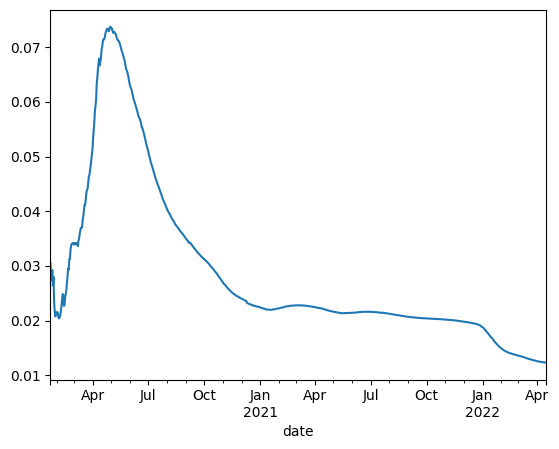

In [72]:
covid_world['ratio'].plot.line();

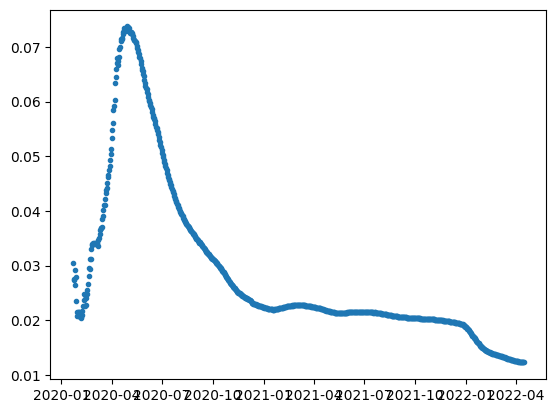

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(covid_world['ratio'].index, covid_world['ratio'].values, marker='.');

In [82]:
# если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс заразить кого-нибудь больше всего?
# Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа;

covid_world.head()

,date,confirmed,recovered,deaths,ratio
date,,,,,
2020-01-22,2020-01-22,2.813131,0.151515,0.085859,0.030521
2020-01-23,2020-01-23,3.318182,0.161616,0.090909,0.027397
2020-01-24,2020-01-24,4.767677,0.196970,0.131313,0.027542
2020-01-25,2020-01-25,7.257576,0.212121,0.212121,0.029228
2020-01-26,2020-01-26,10.707071,0.282828,0.282828,0.026415


In [88]:
cors = []

for shift in range(1, 51):
    cor = np.corrcoef(covid_world['confirmed'].shift(shift).fillna(0), covid_world['confirmed'])[0, 1]
    cors.append(cor)

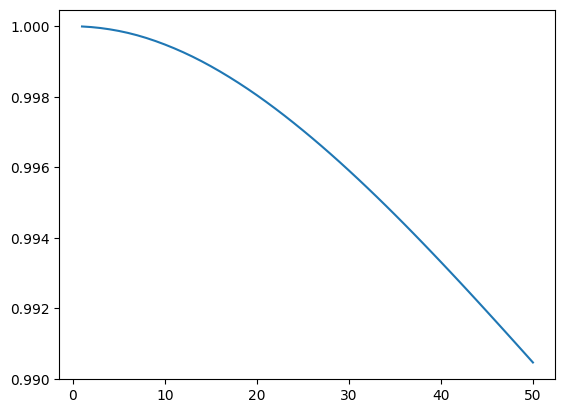

In [89]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, 51), cors);